In [1]:
# Import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import pickle


# Prepare Data

## Import

In [2]:
def wrangle(filename):
    #Read the data 
    df=pd.read_csv(filename).set_index('Id')
    
    # Drop cols with null value above 50%
    df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType'],inplace=True)
    
    # Drop featues with high precentage of zeros
    df.drop(columns=['ScreenPorch','3SsnPorch','PoolArea','MiscVal','BsmtFinSF1','BsmtFinSF2','OpenPorchSF','EnclosedPorch','LowQualFinSF'],inplace=True)
    
    
    return df
    

    

In [3]:
df=wrangle('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=wrangle('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## Explore

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548,TA,TA,Y,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460,TA,TA,Y,298,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608,TA,TA,Y,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642,TA,TA,Y,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836,TA,TA,Y,192,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,567.240411,1057.429452,...,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,441.866955,438.705324,...,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,477.500000,991.500000,...,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,808.000000,1298.250000,...,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2336.000000,6110.000000,...,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,12.000000,2010.000000,755000.000000


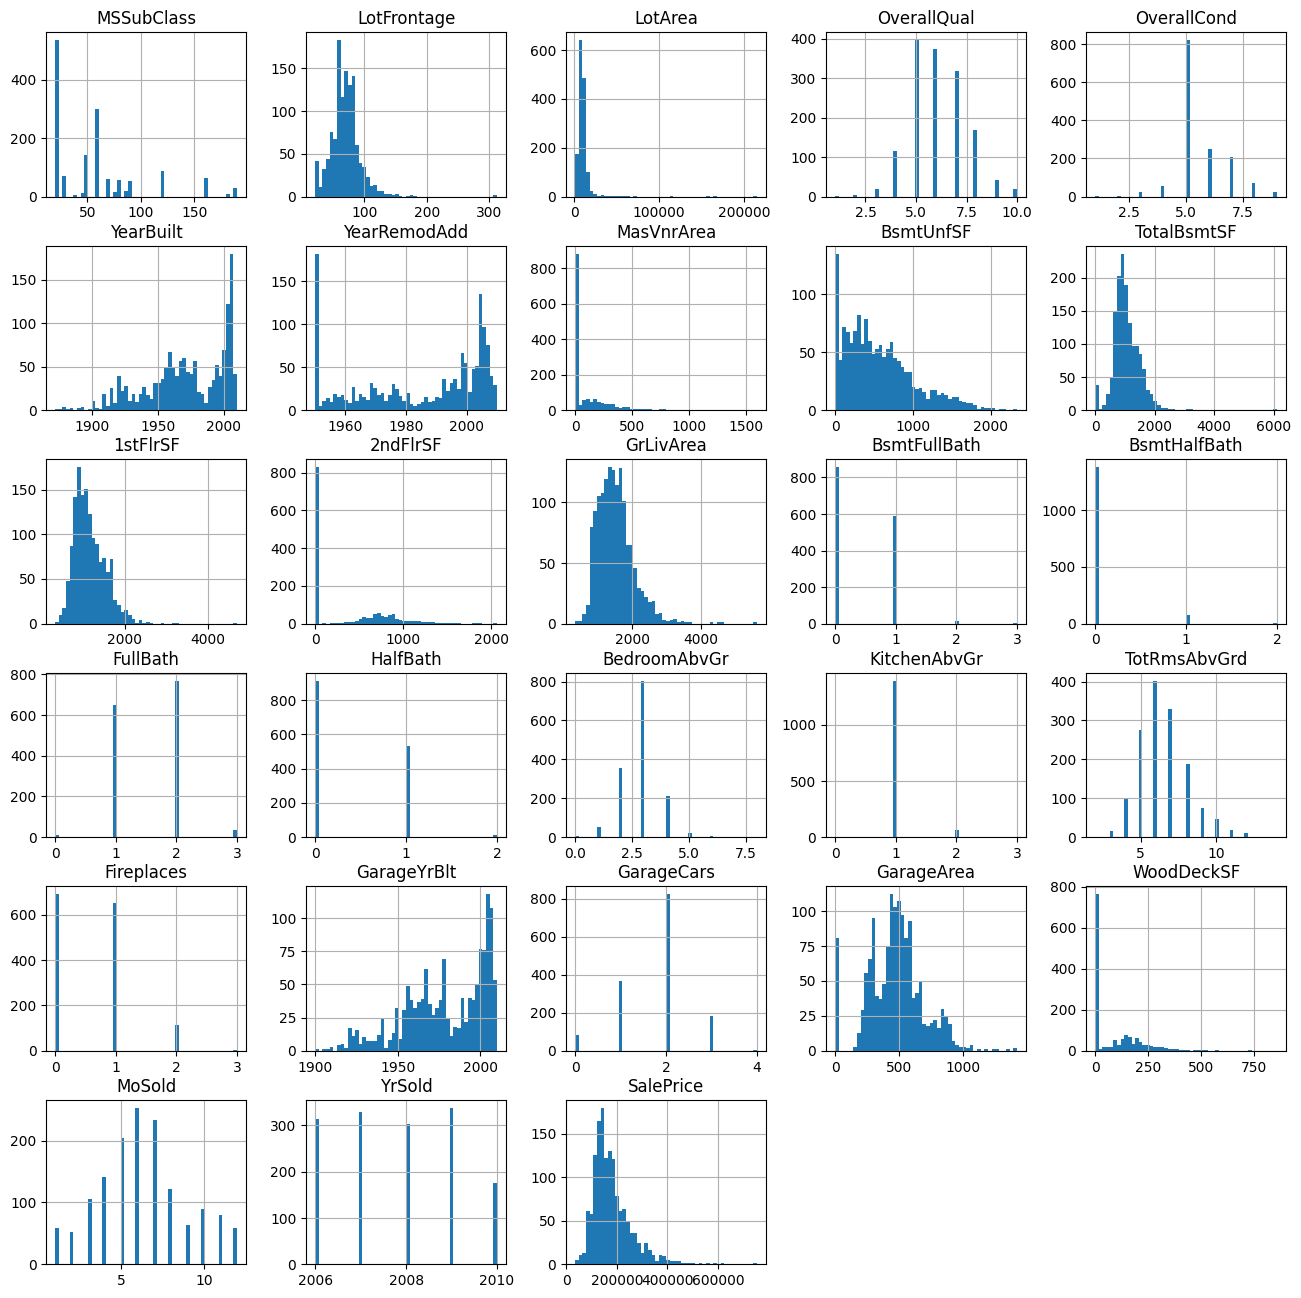

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(16,16))
plt.show()


In [8]:
(df.eq(0).sum()/len(df)*100).sort_values(ascending=False)[:17]

BsmtHalfBath    94.383562
HalfBath        62.534247
MasVnrArea      58.972603
BsmtFullBath    58.630137
2ndFlrSF        56.780822
WoodDeckSF      52.123288
Fireplaces      47.260274
BsmtUnfSF        8.082192
GarageArea       5.547945
GarageCars       5.547945
TotalBsmtSF      2.534247
FullBath         0.616438
BedroomAbvGr     0.410959
KitchenAbvGr     0.068493
KitchenQual      0.000000
GrLivArea        0.000000
1stFlrSF         0.000000
dtype: float64

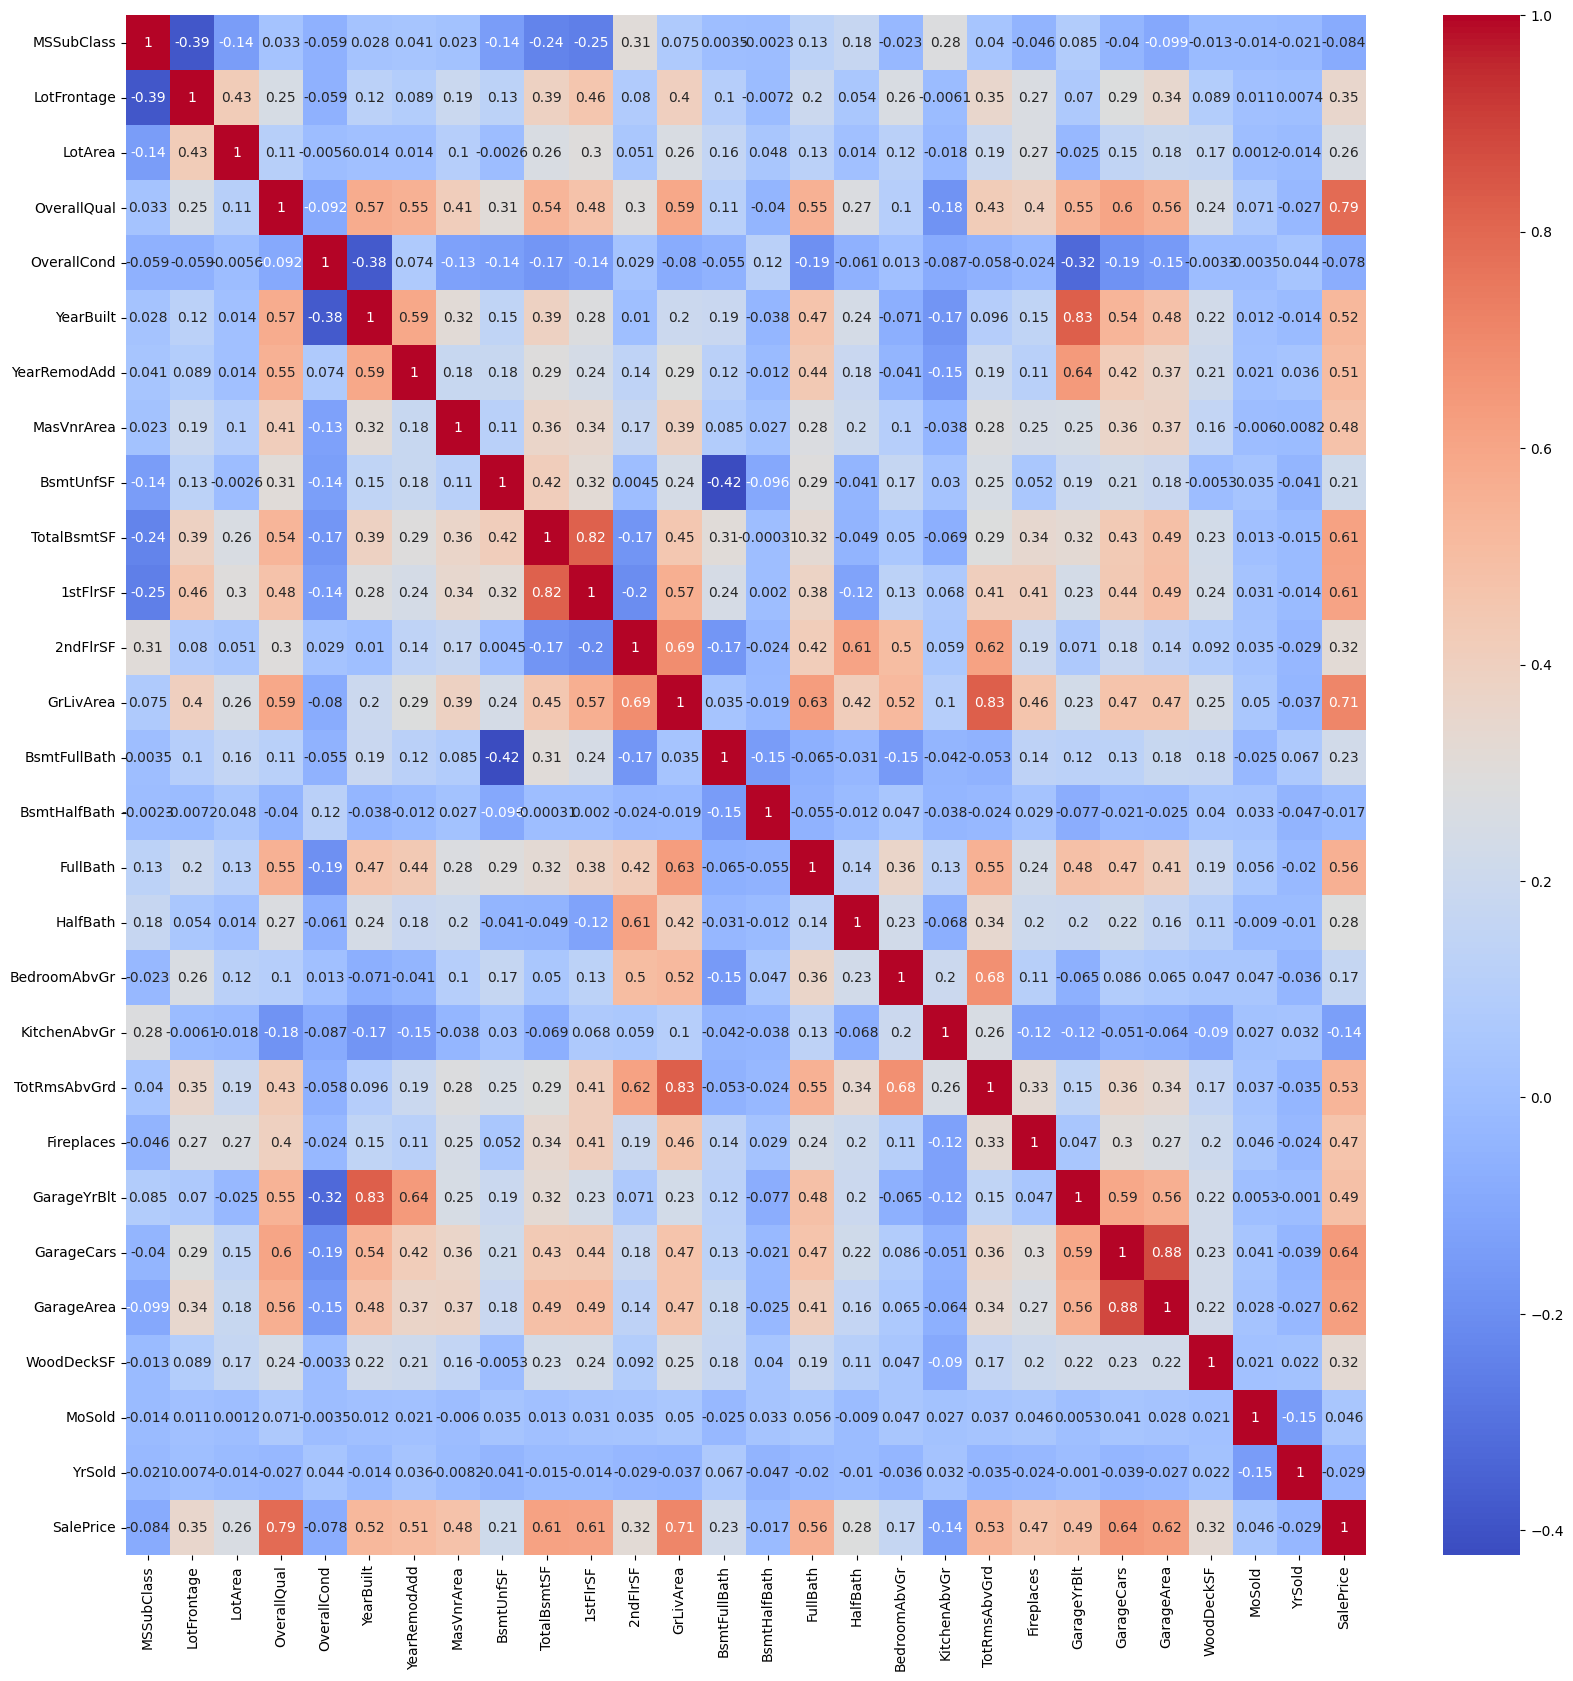

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns=df.select_dtypes('object')).corr(), annot=True, cmap='coolwarm')
plt.show()

## Split

In [10]:
target='SalePrice'
X=df.drop(columns=target)
y=df[target]

In [11]:
le=LabelEncoder()

In [12]:
X=pd.concat([X, test])

In [13]:
def encode(x,le=le):
    for col in x.columns:
        if x[col].dtype == 'object':
            x[col] = le.fit_transform(x[col])
    return x

X=encode(X)

In [14]:
X, test = X[:1460], X[1460:]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Establish a baseline

In [16]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]* len(y_train)
baseline_mse = mean_squared_error(y_train,y_pred_baseline)
print("Mean count:", y_mean)
print("Baseline MSE:", baseline_mse)

Mean count: 181441.5419520548
Baseline MSE: 5964550379.770499


In [17]:
X_train.shape,X_test.shape

((1168, 65), (292, 65))

# Train

In [18]:
# instantiate many models to see which onw will perform better
kn=make_pipeline(
SimpleImputer(),
KNeighborsRegressor()    
    
)
lr=make_pipeline(
SimpleImputer(),
LinearRegression()    
    
)
ridge=make_pipeline(
SimpleImputer(),
Ridge()    
    
)
lasso=make_pipeline(
SimpleImputer(),
Lasso()    
    
)
en=make_pipeline(
SimpleImputer(),
ElasticNet()    
    
)
rf=make_pipeline(
SimpleImputer(),
RandomForestRegressor()    
    
)
gb=make_pipeline(
SimpleImputer(),
GradientBoostingRegressor()    
    
)
svr=make_pipeline(
SimpleImputer(),
SVR()    
    
)


In [19]:
kn.fit(X_train,y_train)
lr.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
en.fit(X_train,y_train)
rf.fit(X_train,y_train)
gb.fit(X_train,y_train)
svr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.562e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('simpleimputer', SimpleImputer()), ('svr', SVR())])

In [20]:
# evaluate all models on the training set
print('KNeighborsRegressor train R^2: %.3f' % kn.score(X_train, y_train))
print('LinearRegression train R^2: %.3f' % lr.score(X_train, y_train))
print('Ridge train R^2: %.3f' % ridge.score(X_train, y_train))
print('Lasso train R^2: %.3f' % lasso.score(X_train, y_train))
print('ElasticNet train R^2: %.3f' % en.score(X_train, y_train))
print('RandomForestRegressor train R^2: %.3f' % rf.score(X_train, y_train))
print('GradientBoostingRegressor train R^2: %.3f' % gb.score(X_train, y_train))
print('SVR train R^2: %.3f' % svr.score(X_train, y_train))


KNeighborsRegressor train R^2: 0.758
LinearRegression train R^2: 0.844
Ridge train R^2: 0.844
Lasso train R^2: 0.844
ElasticNet train R^2: 0.828
RandomForestRegressor train R^2: 0.978
GradientBoostingRegressor train R^2: 0.967
SVR train R^2: -0.045


In [21]:
# evaluate all models on the test set
print('KNeighborsRegressor test R^2: %.3f' % kn.score(X_test, y_test))
print('LinearRegression test R^2: %.3f' % lr.score(X_test, y_test))
print('Ridge test R^2: %.3f' % ridge.score(X_test, y_test))
print('Lasso test R^2: %.3f' % lasso.score(X_test, y_test))
print('ElasticNet test R^2: %.3f' % en.score(X_test, y_test))
print('RandomForestRegressor test R^2: %.3f' % rf.score(X_test, y_test))
print('GradientBoostingRegressor test R^2: %.3f' % gb.score(X_test, y_test))
print('SVR test R^2: %.3f' % svr.score(X_test, y_test))



KNeighborsRegressor test R^2: 0.686
LinearRegression test R^2: 0.848
Ridge test R^2: 0.848
Lasso test R^2: 0.848
ElasticNet test R^2: 0.848
RandomForestRegressor test R^2: 0.895
GradientBoostingRegressor test R^2: 0.913
SVR test R^2: -0.025


## Make more investgation in gradient boosting

In [22]:
cv=cross_val_score(gb, X, y, cv=15,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.1s finished


In [23]:
print(cv)

[0.91654664 0.90945631 0.90261694 0.92852294 0.90566886 0.70821891
 0.89626088 0.88043821 0.89337811 0.8803948  0.9111081  0.91887293
 0.88932386 0.83133327 0.93282408]


In [24]:
params={
    'simpleimputer__strategy':['mean','median'],
    'gradientboostingregressor__n_estimators':[100,200,300,400,500],
    'gradientboostingregressor__max_depth':[1,2,3,4,5],
    
}

In [25]:
grid=GridSearchCV(gb,param_grid=params,cv=5,n_jobs=-1,verbose=1)


In [26]:
grid.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_depth': [1, 2, 3, 4,
                                                                  5],
                         'gradientboostingregressor__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [27]:
grid.score(X_test, y_test)

0.9781161145492244

In [28]:
y_train_pred = grid.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error on Training Set: {mse_train}')

Mean Squared Error on Training Set: 158751273.3980714


In [29]:
y_train_pred = grid.predict(X_test)
mse_test = mean_squared_error(y_test, y_train_pred)
print(f'Mean Squared Error on Validation Set: {mse_test}')

Mean Squared Error on Validation Set: 167856540.0881647


We beat the baseline

# Feature importance

<Axes: >

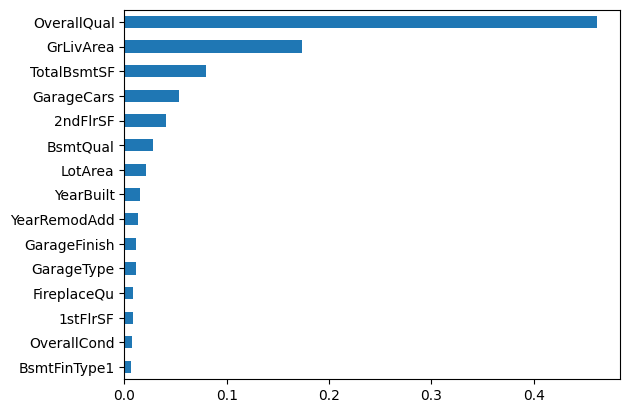

In [30]:
# Get feature names from training data
features = X_train.columns

# Extract importances from model
importances = grid.best_estimator_.named_steps['gradientboostingregressor'].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Plot series
feat_imp.tail(15).plot(kind='barh')

# Save the model

In [31]:
with open ("best_model.pkl",'wb') as m:
    pickle.dump(grid,m)

# Load the model

In [32]:
with open('/kaggle/working/best_model.pkl','rb') as f:
    loaded_model=pickle.load(f)
print(loaded_model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_depth': [1, 2, 3, 4,
                                                                  5],
                         'gradientboostingregressor__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)


# Inference

In [33]:
preds=loaded_model.predict(test)

In [34]:
sub=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [35]:
sub['SalePrice']=preds
sub.head()

,Id,SalePrice
0,1461,114362.896726
1,1462,161091.641006
2,1463,185696.640769
3,1464,192339.362914
4,1465,188968.924866


In [36]:
sub.to_csv('submission.csv',index=False)